In [2]:
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.constants import R_sun

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

font = {'family' : 'courier',
        'weight' : 'normal',
        'size'   : 14}



In [9]:
IDs = [( "TIC277539431", "#ff7f00"),
       ("TIC237880881", "#f781bf"), 
       ("TIC44984200", "#4daf4a"),
       ("TIC452922110", "#377eb8")]

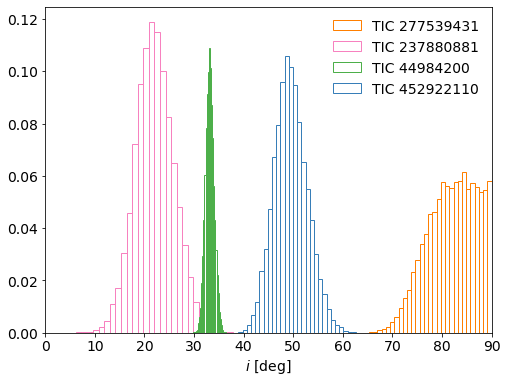

In [13]:
plt.figure(figsize=(8,6))
for ID, c in IDs:
    df = pd.read_csv(f"../../data/inclinations/{ID}_post.dat", header=None, delimiter="\s+")

    arr = df.to_numpy().flatten()

    counts, bins = np.histogram(arr, bins=30)
    mids = (bins[1:] + bins[:-1]) / 2.
    width = bins[1] - bins[0]

    plt.bar(mids, counts/len(arr), width=width, label=f"{ID[:3]} {ID[3:]}", edgecolor=c, color="w",alpha=1)
plt.legend(frameon=False, fontsize=14)
plt.xlabel(r"$i$ [deg]", fontsize=14)
plt.xlim(0,90)
plt.savefig(f"../plots/flarefit/"
            f"05_11_2020_Nature_empirical_inclinations.png",
            dpi=300)

<BarContainer object of 30 artists>

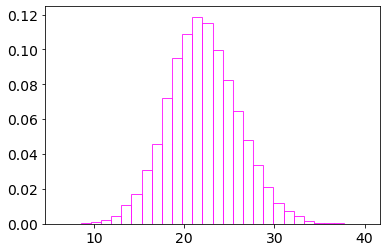

In [14]:
ID = str(237880881)
c="magenta"
df = pd.read_csv(f"../../data/inclinations/TIC{ID}_post.dat", header=None, delimiter="\s+")

arr = df.to_numpy().flatten()

counts, bins = np.histogram(arr, bins=30)
mids = (bins[1:] + bins[:-1]) / 2.
width = bins[1] - bins[0]

plt.bar(mids, counts/len(arr), width=width, label=f"{ID[:3]} {ID[3:]}", edgecolor=c, color="w",alpha=.8)

In [16]:
from astropy.modeling.models import Gaussian1D
from astropy.modeling import fitting

np.random.seed(0)
x = mids /180 *np.pi
y = counts.astype(float)/len(arr)
g1 = Gaussian1D(amplitude=.2, mean=21/180*np.pi, stddev=0.05)
g1.bounding_box.amplitude = (0, 1.) #I am not sure this format is right because I cannot find an example in astropy
g1.bounding_box.mean = (0,np.pi/2)
g2 = Gaussian1D(amplitude=0.05, mean=.44, stddev=.05)
g2.bounding_box.amplitude = (.0, 1.)
g2.bounding_box.mean = (0,np.pi/2)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g1 , x, y)#

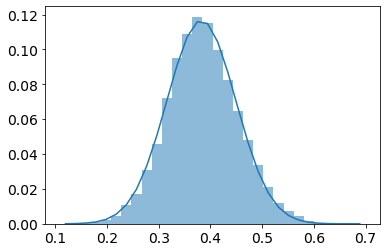

In [17]:
plt.bar(x, counts/len(arr), width=width/180 *np.pi, alpha=0.5)
plt.plot(x, g(x))

In [23]:
g.mean, g.stddev

(Parameter('mean', value=0.382401784301274),
 Parameter('stddev', value=0.06664487587456314, bounds=(1.1754943508222875e-38, None)))

In [14]:
# 44948200
# mean=33.09502407/180*np.pi
# stddev=0.8462761/180*np.pi

# mean, stddev

(0.5776171360482742, 0.014770304325936782)

In [8]:
path = f"../../data/inclinations/{ID}_post_compound.p"
pickle.dump( g, open( path, "wb" ) )